In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults



In [159]:
%matplotlib widget


In [3]:
data = pd.read_csv('/content/drive/My Drive/Cona_Mock/C005_scan_data.csv')

In [4]:
data.head()

,kunag,matnr,date,qty,flag
0,500059037,0001A3EO050187915,2020-08-28,1.25,1
1,500059037,0001A3EO050187915,2020-08-27,0.75,1
2,500059037,0001A3EO050187915,2020-08-26,0.25,1
3,500059037,0001A3EO050187915,2020-08-25,0.50,1
4,500059037,0001A3EO050187915,2020-08-24,0.25,1


In [5]:
data = data[data.flag != 4]

In [34]:
data['date'] = pd.to_datetime(data['date'])

In [12]:
grouped_df = data.groupby(["kunag", "matnr"])


In [13]:
grouped_df.head()

,kunag,matnr,date,qty,flag
0,500059037,0001A3EO050187915,2020-08-28,1.250000,1
1,500059037,0001A3EO050187915,2020-08-27,0.750000,1
2,500059037,0001A3EO050187915,2020-08-26,0.250000,1
3,500059037,0001A3EO050187915,2020-08-25,0.500000,1
4,500059037,0001A3EO050187915,2020-08-24,0.250000,1
...,...,...,...,...,...
1064336,500398693,00160010050187665,2020-08-21,0.083333,1
1064337,500398693,00160010050187665,2020-08-20,0.125000,1
1064338,500398693,00160010050187665,2020-08-19,0.041667,1
1064339,500398693,00160010050187665,2020-08-18,0.083333,1


In [20]:
materials = (data.matnr.unique())
customers = (data.kunag.unique())

In [22]:
print(customers)
print(materials)

[500059037 500059038 500059050 500059055 500066660 500095874 500292517
 500298742 500435546 500802219 500059018 500059048 500059052 500059072
 500059181 500059746 500062451 500073239 500974893 500059021 500059023
 500059042 500059060 500062011 500073421 500386810 500926049 501037553
 500059053 500059054 500059067 500059068 500075492 500059019 500059071
 500272413 500283364 500570643 500059045 500059040 500264761 500513193
 500059059 500059070 500398693 500059043]
['0001A3EO050187915' 'AB6G0112050187665' 'ADNX06550500775340'
 'ACKPA07H0501875315' '00010655050077535' '00022084050180245'
 '00143497050300245' 'ACLU64540500775040' 'AB6G0103050181795'
 'ACKOA07H0501875315' 'A9I70112050297665' '00012084050180245'
 'A1U692620501875718' '0535A4GI0501883515' 'A3T50010050187662'
 '00020761050077465' 'A49964540500775040' '59253680050181795'
 '7060A4GI0501883515' 'AC9406550500775340' '0014A3EN050307915'
 '02160112050187665' '42770113050187662' '00140886050307465'
 'A6P90112050297665' '0001088505018

In [35]:
single_series = data.loc[(data.kunag == 500059037) & (data.matnr == '0001A3EO050187915')]

In [36]:
single_series = single_series.sort_values('date')

In [37]:
len(single_series)

479

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(single_series)

         kunag              matnr       date   qty  flag
478  500059037  0001A3EO050187915 2018-01-03  0.25     1
477  500059037  0001A3EO050187915 2018-01-09  0.50     1
476  500059037  0001A3EO050187915 2018-01-11  0.50     1
475  500059037  0001A3EO050187915 2018-01-17  0.25     1
474  500059037  0001A3EO050187915 2018-01-18  1.50     1
473  500059037  0001A3EO050187915 2018-01-20  0.50     1
472  500059037  0001A3EO050187915 2018-01-29  0.25     1
471  500059037  0001A3EO050187915 2018-02-01  1.00     1
470  500059037  0001A3EO050187915 2018-02-03  0.25     1
469  500059037  0001A3EO050187915 2018-02-04  1.00     1
468  500059037  0001A3EO050187915 2018-02-08  0.50     1
467  500059037  0001A3EO050187915 2018-02-15  0.50     1
466  500059037  0001A3EO050187915 2018-02-27  0.50     1
465  500059037  0001A3EO050187915 2018-03-04  0.25     1
464  500059037  0001A3EO050187915 2018-03-24  0.75     1
463  500059037  0001A3EO050187915 2018-03-28  0.25     1
462  500059037  0001A3EO0501879

In [39]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
single_series.set_index('date', inplace=True)

In [40]:
single_series.head()

,kunag,matnr,qty,flag
date,,,,
2018-01-03,500059037,0001A3EO050187915,0.25,1
2018-01-09,500059037,0001A3EO050187915,0.50,1
2018-01-11,500059037,0001A3EO050187915,0.50,1
2018-01-17,500059037,0001A3EO050187915,0.25,1
2018-01-18,500059037,0001A3EO050187915,1.50,1


In [41]:
single_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 479 entries, 2018-01-03 to 2020-08-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kunag   479 non-null    int64  
 1   matnr   479 non-null    object 
 2   qty     479 non-null    float64
 3   flag    479 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 18.7+ KB


In [42]:
data_ts1 = single_series['qty']

In [43]:
data_ts1.head(10)

date
2018-01-03    0.25
2018-01-09    0.50
2018-01-11    0.50
2018-01-17    0.25
2018-01-18    1.50
2018-01-20    0.50
2018-01-29    0.25
2018-02-01    1.00
2018-02-03    0.25
2018-02-04    1.00
Name: qty, dtype: float64

Text(0, 0.5, 'Cases Ordered')

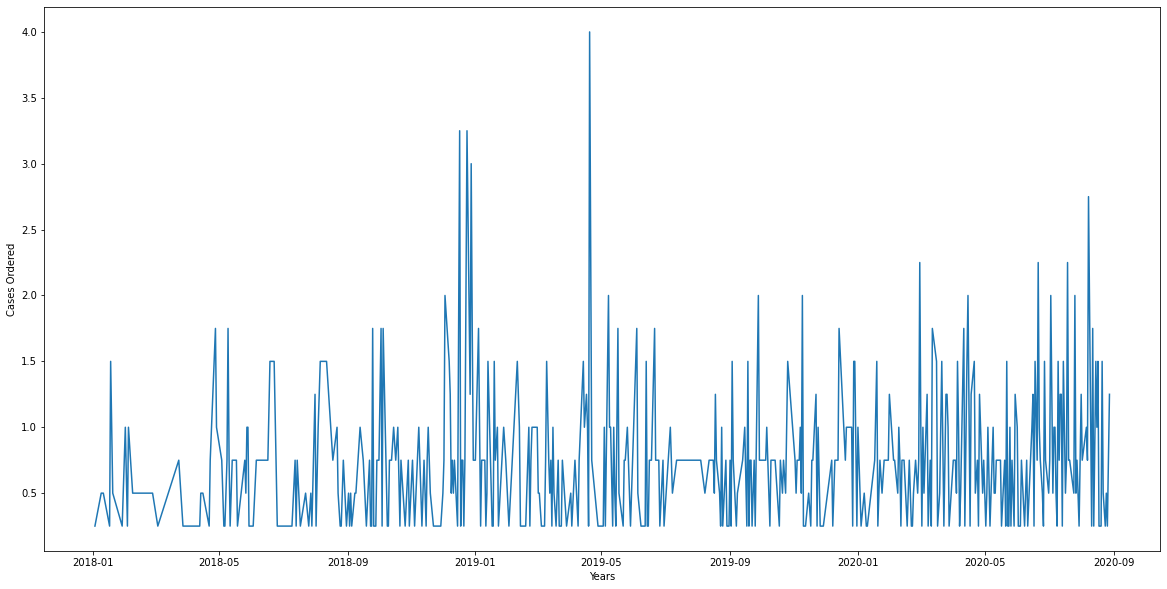

In [46]:
plt.figure(figsize=(20, 10))
plt.plot(data_ts1)
plt.xlabel('Years')
plt.ylabel('Cases Ordered')

In [50]:
decomposition = sm.tsa.seasonal_decompose(data_ts1, freq=30, extrapolate_trend=8)

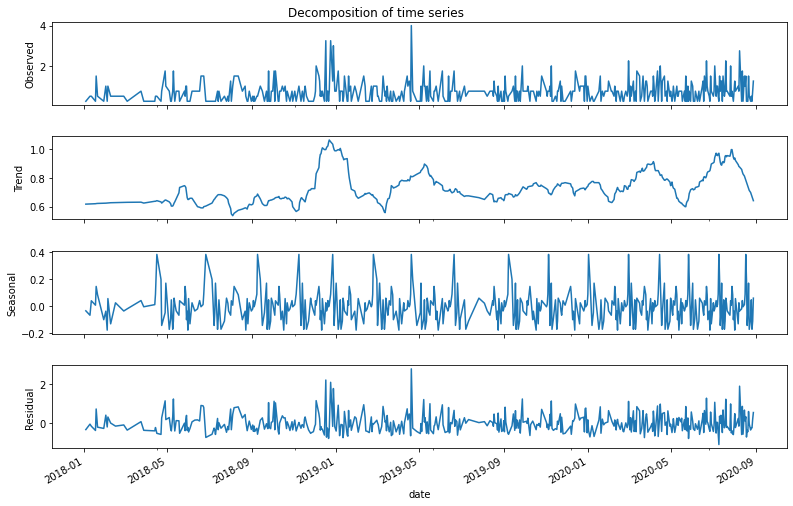

In [58]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of time series')
plt.show()

In [52]:
data_ts1_diff1 = data_ts1.diff(1)

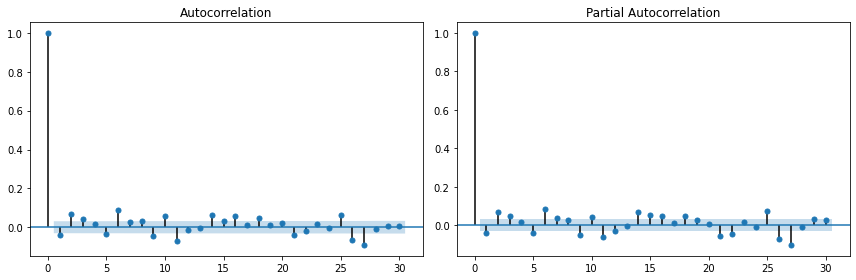

In [53]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(data_ts1, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(data_ts1, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

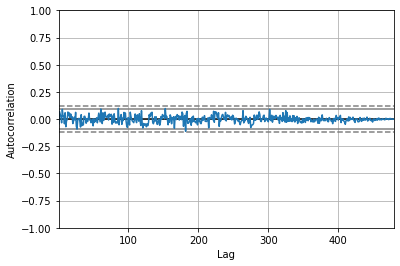

In [57]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_ts1)
plt.show()

In [64]:
data_ts1.columns = ['y']
print(data_ts1.columns)


['y']


In [69]:
train = data_ts1[:400]
test = data_ts1[400:]

In [94]:
train.describe()

count    400.000000
mean       0.722500
std        0.513471
min        0.250000
25%        0.250000
50%        0.750000
75%        1.000000
max        4.000000
Name: qty, dtype: float64

In [75]:
type(train)

pandas.core.series.Series

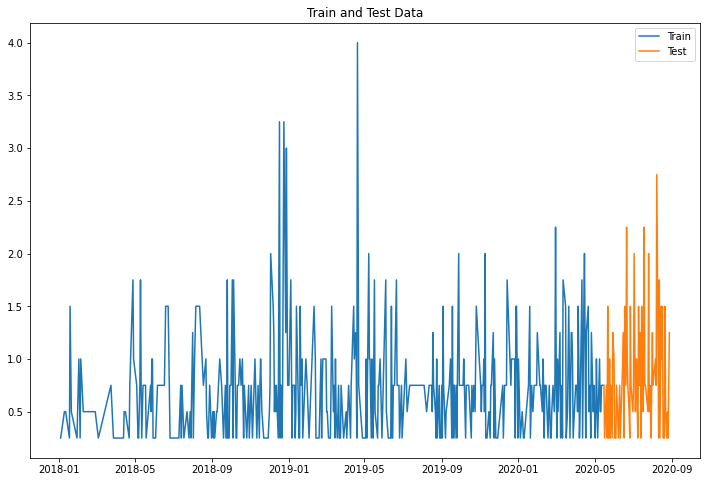

In [77]:
plt.figure(figsize=(12,8))
plt.title("Train and Test Data")
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index,test.values, label='Test')
plt.legend(loc='best')
plt.show()

## Naive Method

In [79]:
dd = np.asarray(train.values)
lastvalue = dd[len(dd)-1]

In [85]:
y_hat = test.copy()
y_hat = y_hat.to_frame()
y_hat['naive'] = lastvalue
y_hat.describe()


,qty,naive
count,79.000000,79.00
mean,0.829114,0.75
std,0.564074,0.00
min,0.250000,0.75
25%,0.250000,0.75
50%,0.750000,0.75
75%,1.125000,0.75
max,2.750000,0.75


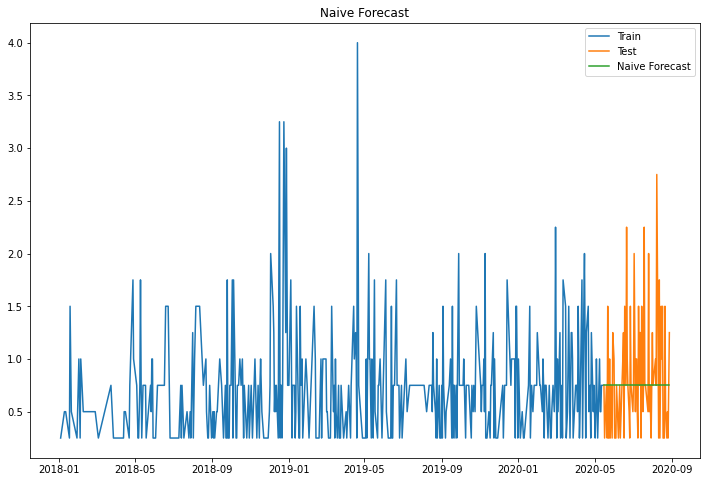

In [88]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index,test.values, label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.values, y_hat.naive))
print(rms)

0.566048931104956


## Average Method

In [91]:
avg_value = train.values.mean()
y_hat['average'] = avg_value


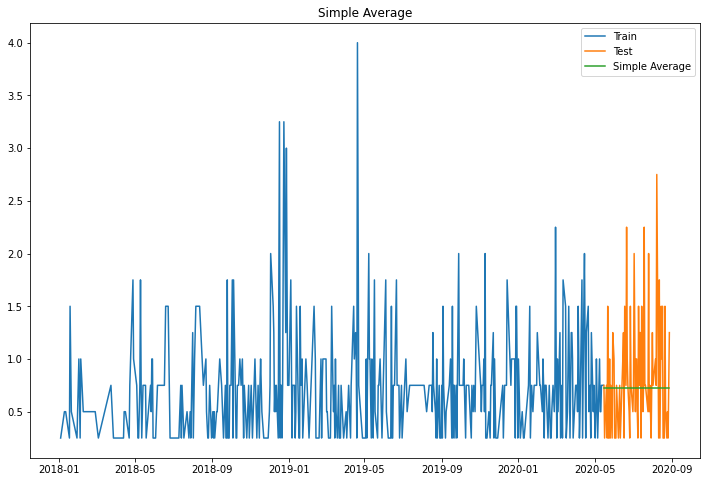

In [93]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index,test.values, label='Test')
plt.plot(y_hat.index,y_hat['average'], label='Simple Average')
plt.legend(loc='best')
plt.title("Simple Average")
plt.show()

In [95]:
rms = sqrt(mean_squared_error(test.values, y_hat.average))
print(rms)

0.5705426436541339


## Moving Average

In [97]:
train = train.to_frame()

In [100]:
y_hat['moving_avg'] = train['qty'].rolling(100).mean().iloc[-1]

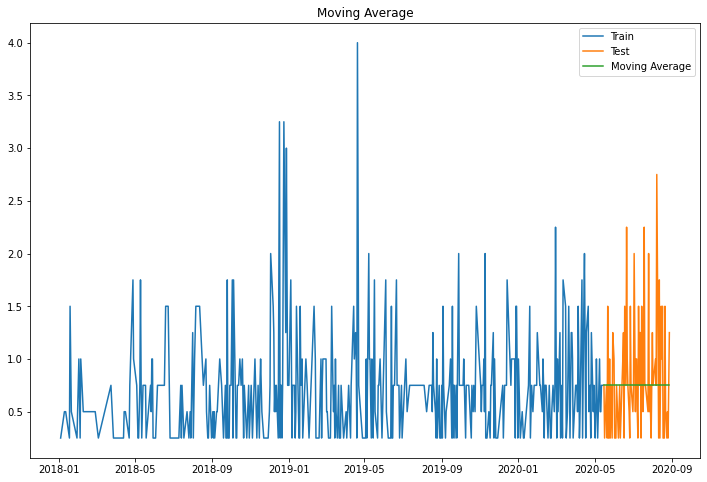

In [102]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['qty'], label='Train')
plt.plot(test.index,test.values, label='Test')
plt.plot(y_hat.index,y_hat['moving_avg'], label='Moving Average')
plt.legend(loc='best')
plt.title("Moving Average")
plt.show()

In [103]:
rms = sqrt(mean_squared_error(test.values, y_hat.moving_avg))
print('RMSE = '+str(rms))

RMSE = 0.5650494965437133


## SES

In [106]:
fit2 = SimpleExpSmoothing(np.asarray(train['qty'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))

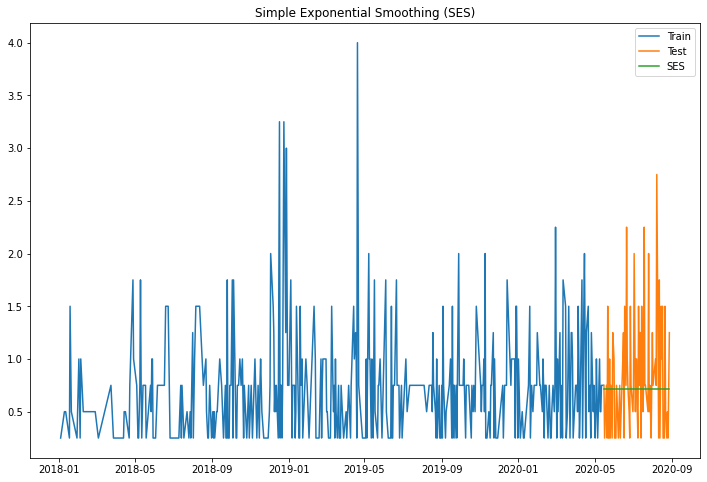

In [107]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['qty'], label='Train')
plt.plot(test.index,test.values, label='Test')
plt.plot(y_hat.index,y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

In [108]:
rms = sqrt(mean_squared_error(test.values, y_hat.SES))
print('RMSE = '+str(rms))

RMSE = 0.5711948729836873


## Holt Winter's

In [135]:
fit1 = ExponentialSmoothing(np.asarray(train['qty']),seasonal_periods=52 ,trend='add', seasonal='add').fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


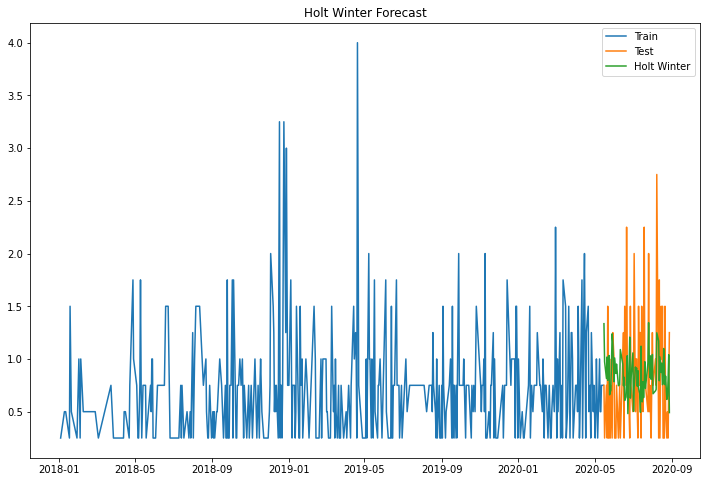

In [136]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['qty'], label='Train')
plt.plot(test.index,test.values, label='Test')
plt.plot(y_hat.index,y_hat['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.title("Holt Winter Forecast")
plt.show()

In [137]:
rms = sqrt(mean_squared_error(test.values, y_hat.Holt_Winter))
print('RMSE = '+str(rms))

RMSE = 0.6182352980960522


## ARIMA

In [142]:
%pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 17.0MB/s 
     |████████████████████████████████| 808kB 34.9MB/s 
     |████████████████████████████████| 2.1MB 46.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [143]:
from pmdarima import auto_arima # for determining ARIMA orders


stepwise_fit = auto_arima(data_ts1.values, start_p=0, start_q=0,
                          max_p=3, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1266.706, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1002.821, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1135.974, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=891.346, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=846.783, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=750.601, Time=0.53 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=750.297, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=749.554, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=750.439, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1058.903, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=749.690, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=741.756, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=742.702, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=742.595, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  479
Model:                        SARIMAX   Log Likelihood                -368.730
Date:                Tue, 20 Oct 2020   AIC                            741.459
Time:                        07:08:21   BIC                            749.803
Sample:                             0   HQIC                           744.739
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7401      0.032     23.260      0.000       0.678       0.802
sigma2         0.2730      0.012     22.484      0.000       0.249       0.297
===================================================================================
Ljung-Box (Q):                       39.72   Jarque-Bera (JB):               865.12
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             1.81
Prob(H) (two-sided):                  0.41   Kurtosis:                         8.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
model = ARIMA(train['qty'],order=(2,0,1))
results = model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  if date_index and not is_monotonic:


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    qty   No. Observations:                  400
Model:                     ARMA(2, 1)   Log Likelihood                -299.522
Method:                       css-mle   S.D. of innovations              0.512
Date:                Tue, 20 Oct 2020   AIC                            609.045
Time:                        07:11:45   BIC                            629.002
Sample:                             0   HQIC                           616.948
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7222      0.029     25.033      0.000       0.666       0.779
ar.L1.qty      0.5609      0.652      0.860      0.390      -0.717       1.839
ar.L2.qty      0.0611      0.055      1.106      0.270      -0.047       0.169
ma.L1.qty     -0.5733      0.653     -0.878      0.381      -1.854       0.707
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5285           +0.0000j            1.5285            0.0000
AR.2          -10.7148           +0.0000j           10.7148            0.5000
MA.1            1.7442           +0.0000j            1.7442            0.0000
-----------------------------------------------------------------------------
"""

In [146]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('ARIMA(2,0,1) Predictions')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  prediction_index = self.data.row_labels[start:end + 1]


In [151]:
type(predictions)

pandas.core.series.Series

In [153]:
for i in range(len(predictions)):
    print(f"predicted={predictions.values[i]:<11.10}, expected={test.values[i]}")

predicted=0.7138274366, expected=0.75
predicted=0.7191850726, expected=0.25
predicted=0.7199815543, expected=0.75
predicted=0.7207554436, expected=0.25
predicted=0.7212381592, expected=1.5
predicted=0.7215561729, expected=0.25
predicted=0.7217640246, expected=0.25
predicted=0.7219000286, expected=1.0
predicted=0.721989006, expected=0.25
predicted=0.7220472187, expected=0.75
predicted=0.7220853038, expected=0.25
predicted=0.7221102206, expected=1.25
predicted=0.7221265221, expected=1.0
predicted=0.7221371872, expected=0.25
predicted=0.7221441648, expected=0.25
predicted=0.7221487297, expected=0.75
predicted=0.7221517163, expected=0.25
predicted=0.7221536703, expected=0.75
predicted=0.7221549486, expected=0.25
predicted=0.722155785, expected=1.0
predicted=0.7221563321, expected=1.25
predicted=0.7221566901, expected=0.25
predicted=0.7221569243, expected=1.5
predicted=0.7221570776, expected=0.75
predicted=0.7221571778, expected=2.25
predicted=0.7221572434, expected=1.0
predicted=0.72215728

In [162]:
%matplotlib widget

plt.figure(figsize=(12,8))
plt.plot(train.index, train['qty'], label='Train')
plt.plot(test.index,test.values, label='Test')
plt.plot(test.index,predictions.values, label='Holt Winter')
plt.legend(loc='best')
plt.title("Holt Winter Forecast")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [164]:
!pip install -c conda-forge nodejs
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter lab build

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'
Traceback (most recent call last):
  File "/usr/local/bin/jupyter", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 230, in main
    command = _jupyter_abspath(subcommand)
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 133, in _jupyter_abspath
    'Jupyter command `{}` not found.'.format(jupyter_subcommand)
Exception: Jupyter command `jupyter-labextension` not found.
Traceback (most recent call last):
  File "/usr/local/bin/jupyter", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 230, in main
    command = _jupyter_abspath(subcommand)
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 133, in _jupyter_abspath
    'Jupyter command `{}` not found.'.format(jupyter_subcommand)
Exception: Jupyter comman